In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [27]:
# read and  load the data
train_data=datasets.FashionMNIST(root="datasets", train=True, download=True,transform=ToTensor())
test_data=datasets.FashionMNIST(root="datasets", train=False, download=True,transform=ToTensor())

batch_size=64
train_dataloader=DataLoader(train_data, batch_size=batch_size)
test_dataloader=DataLoader(test_data, batch_size=batch_size)

In [28]:
for X,y in train_dataloader:
    print(f" X shape:{X.shape}")
    print(f" y shape :{y.shape}")
    break 

model=2

 X shape:torch.Size([64, 1, 28, 28])
 y shape :torch.Size([64])


In [79]:
# Make predictions\

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x,y=test_data[5][0], test_data[5][1]

with torch.no_grad():
    pred=model(x)
    #predicted, actual=classes[pred.argmax(0)], classes[y]
    #print(f"Predicted label:{predicted}, Actual label:{actual}")
    print(pred[0])
    print(pred[0].argmax())

tensor([  6.3519,  11.4723,   3.0068,   4.1645,   4.9587,  -9.2635,   1.2035,
         -6.6207,  -0.6818, -10.9760])
tensor(1)


In [48]:
# Build a Neural Network Model

device=("cuda" if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else "cpu")

class NeuralNetwork(nn.Module):
    def __init__(self)->None:
        super().__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(
                                    nn.Linear(28*28, 512),
                                    nn.ReLU(),
                                    nn.Linear(512,512),
                                    nn.ReLU(),
                                    nn.Linear(512,10)
                                )
    def forward(self, x):
        ''' 
        Define the forward propagation
        '''
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits

            
model=NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [49]:
# Set up loss function and optimizer

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=1e-3)

In [62]:
# Define the training process
def train(model, dataloader, loss_fn, optimizer):
    '''
    Define the training flow 
    '''
    size = len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X,y=X.to(device), y.to(device)

        pred=model(X)
        loss=loss_fn(pred,y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100==0:
            loss, current=loss.item(),(batch+1)*len(X)
            print(f"loss:{loss:>7f}, [{current:>5d}/{size:>5d}]")




In [64]:
# Define the test flow
def test(model, dataloader, loss_fn)->None:
    '''
    Define the test flow 
    '''
    size=len(dataloader.dataset)
    num_batches=len(dataloader)
    model.eval()
    test_loss, correct= 0, 0.00
    with torch.no_grad():
        for X, y in dataloader:
            X,y=X.to(device), y.to(device)
            pred=model(X)
            test_loss+=loss_fn(pred,y)
            correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss /=num_batches
    correct/=size
    print(f"Test Error:\n Avg loss:{test_loss:>8f}, Accuracy:{100*correct:>0.1f}\n")



In [66]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(model,train_dataloader,loss_fn, optimizer)
    test(model, test_dataloader, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss:0.449419, [   64/60000]
loss:0.554374, [ 6464/60000]
loss:0.357101, [12864/60000]
loss:0.599198, [19264/60000]
loss:0.536319, [25664/60000]
loss:0.543077, [32064/60000]
loss:0.539810, [38464/60000]
loss:0.671079, [44864/60000]
loss:0.649779, [51264/60000]
loss:0.518085, [57664/60000]
Test Error:
 Avg loss:0.535109, Accuracy:81.3

Epoch 2
-------------------------------
loss:0.443070, [   64/60000]
loss:0.548963, [ 6464/60000]
loss:0.352802, [12864/60000]
loss:0.594086, [19264/60000]
loss:0.531066, [25664/60000]
loss:0.538433, [32064/60000]
loss:0.534598, [38464/60000]
loss:0.671314, [44864/60000]
loss:0.648164, [51264/60000]
loss:0.511465, [57664/60000]
Test Error:
 Avg loss:0.531114, Accuracy:81.5

Epoch 3
-------------------------------
loss:0.436985, [   64/60000]
loss:0.543946, [ 6464/60000]
loss:0.348741, [12864/60000]
loss:0.589138, [19264/60000]
loss:0.525858, [25664/60000]
loss:0.533823, [32064/60000]
loss:0.529676, [38464/60000]
los

In [67]:
# Save a Pytorch model
torch.save(model.state_dict(), "outputs/model.pth")

In [68]:
# Load a Pytorch model
model=NeuralNetwork().to(device)
model.load_state_dict(torch.load("outputs/model.pth"))

<All keys matched successfully>

In [81]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0], test_data[3][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    #predicted, actual = classes[pred[0].argmax(0)], classes[y]
    #print(f'Predicted: "{predicted}", Actual: "{actual}"')
    print(pred)

tensor([[ 1.8417, 13.5450,  1.0167,  4.7121,  2.4680, -6.1879, -3.2226, -3.3798,
         -3.4127, -5.0663]])


In [82]:
torch.ones(2)

tensor([1., 1.])

In [108]:
batch_size=10

test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(X.shape)
    print(y.shape)
    break

torch.Size([10, 1, 28, 28])
torch.Size([10])


In [109]:
X.shape

torch.Size([10, 1, 28, 28])

In [116]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
with torch.no_grad():
    X = X.to(device)
    pred = model(X)
    acc= (pred.argmax(1)== y).type(torch.float).sum().item()/len(X)
    #print(f'Predicted: "{predicted}", Actual: "{actual}"')
    print(f"Accuracy:{acc}")

Accuracy:1.0


In [249]:
import numpy as np

train_X=np.random.normal(0,5,size=(60000,200))
train_y=np.random.randint(0,10, size=(60000,1))

test_X=np.random.normal(0,5,size=(10000,200))
test_y=np.random.randint(0,10, size=(10000,1))

train_X=torch.tensor(train_X)
train_y=torch.tensor(train_y)

test_X=torch.tensor(test_X)
test_y=torch.tensor(test_y)

In [5]:
def get_target(var:np.array)->int:
    '''
    Generate the target
    '''
    sum_var=var.sum()
    target=(0 if sum_var<-100 else 1 if -100<=sum_var and sum_var<-75 else 2 if -75<=sum_var and sum_var<-50 
            else 3 if -50<=sum_var and sum_var<-25 else 4 if -25<=sum_var and sum_var<0 else 5 if 0<=sum_var and sum_var<25
            else 6 if 25<=sum_var and sum_var<50 else 7 if 50<=sum_var and sum_var<75 else 8 if 75<=sum_var and sum_var<100
            else 9 )
    return target

In [252]:
train_data=[(train_X[i,:].type(torch.float), get_target(train_X[i,:])) for i in range(len(train_X))]

In [253]:
targets=[value[1] for value in train_data]

In [254]:
from collections import Counter

Counter(targets)

Counter({4: 8340,
         5: 8152,
         3: 7281,
         6: 7261,
         2: 5876,
         7: 5856,
         0: 4663,
         9: 4659,
         1: 3966,
         8: 3946})

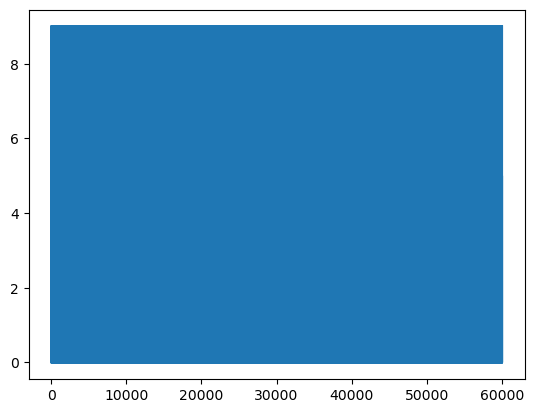

In [255]:
import matplotlib.pyplot as plt

plt.plot(figsize=(9,5))

plt.plot(targets)

plt.show()

In [270]:
train_data=[(train_X[i,:].type(torch.float), get_target(train_X[i,:])) for i in range(len(train_X))]
test_data=[(test_X[i,:].type(torch.float), get_target(test_X[i,:])) for i in range(len(test_X))]

train_dataloader=DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader=DataLoader(test_data, batch_size=64, shuffle=True)

In [263]:
# read and  load the data
train_data=datasets.FashionMNIST(root="datasets", train=True, download=True,transform=ToTensor())
test_data=datasets.FashionMNIST(root="datasets", train=False, download=True,transform=ToTensor())

batch_size=64
train_dataloader=DataLoader(train_data, batch_size=batch_size)
test_dataloader=DataLoader(test_data, batch_size=batch_size)

In [271]:
for X,y in test_dataloader:
    print(X.shape)
    print(y.shape)
    break

torch.Size([64, 200])
torch.Size([64])


In [272]:
# Define a neural network with pytorch
device=("cuda" if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else "cpu")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten=nn.Flatten()
        self.linear_relu_stack=nn.Sequential(nn.Linear(200,100),
                                            nn.ReLU(),
                                            nn.Linear(100,50),
                                            nn.ReLU(),
                                            nn.Linear(50,10))
    def forward(self, x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits

model=NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=10, bias=True)
  )
)


In [273]:
# loss and optimizer
optimizer=torch.optim.SGD(model.parameters(), lr=1e-3)
loss_fn=nn.CrossEntropyLoss()

In [274]:
# Define the training process
def train(model, dataloader, loss_fn, optimizer):
    '''
    define the training process
    '''
    size=len(dataloader.dataset)
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X,y=X.to(device), y.to(device)
        pred=model(X)
        loss=loss_fn(pred,y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch %100==0:
            loss, current= loss.item(), (batch+1)*len(X)
            print(f"loss: {loss:>7} [{current:>5d}/{size:>5d}]")





In [275]:
# Define the testing process

def test(model, dataloader, loss_fn):
    ''' 
    Define the test process
    '''
    size=len(dataloader.dataset)
    num_batches=len(dataloader)
    model.eval()
    loss, true_value=0,0.0
    with torch.no_grad():
        for X, y in dataloader:
            X,y=X.to(device), y.to(device)
            pred=model(X)
            loss+=loss_fn(pred, y)
            true_value+=(pred.argmax(1)==y).type(torch.float).sum().item()
        loss/=num_batches
        true_value/=size
        print(f"Test\n Avg loss:{loss:>7f}  Accuracy:{100*true_value:>0.7f}\n")

In [288]:
# Train the model

epochs=200

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(model, train_dataloader, loss_fn, optimizer)
    test(model, test_dataloader, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.09339071065187454 [   64/60000]
loss: 0.11036552488803864 [ 6464/60000]
loss: 0.11380371451377869 [12864/60000]
loss: 0.07118279486894608 [19264/60000]
loss: 0.1207258403301239 [25664/60000]
loss: 0.09571214765310287 [32064/60000]
loss: 0.09258297085762024 [38464/60000]
loss: 0.11331567168235779 [44864/60000]
loss: 0.11045859754085541 [51264/60000]
loss: 0.10776165127754211 [57664/60000]
Test
 Avg loss:0.408193  Accuracy:83.3300000

Epoch 2
-------------------------------
loss: 0.07629156857728958 [   64/60000]
loss: 0.10039164870977402 [ 6464/60000]
loss: 0.08349606394767761 [12864/60000]
loss: 0.12915745377540588 [19264/60000]
loss: 0.056978728622198105 [25664/60000]
loss: 0.17403922975063324 [32064/60000]
loss: 0.09678943455219269 [38464/60000]
loss: 0.08412624150514603 [44864/60000]
loss: 0.2016955018043518 [51264/60000]
loss: 0.12888219952583313 [57664/60000]
Test
 Avg loss:0.410633  Accuracy:83.5000000

Epoch 3
---------------------

In [290]:
# Save the model
torch.save(model.state_dict(), "outputs/model.pth")



In [291]:
# Retrieve the model and make a prediction
model=NeuralNetwork().to(device)
model.load_state_dict(torch.load("outputs/model.pth"))

<All keys matched successfully>

In [293]:
predictions=[]
for X,y in test_dataloader:
    model.eval()
    with torch.no_grad():
        X,y=X.to(device), y.to(device)
        pred=model(X)
        predictions.append(pred.argmax(1))

In [294]:
len(predictions)

157

In [298]:
concatenated_predictions=torch.cat(predictions, dim=0)

In [299]:
concatenated_predictions.shape

torch.Size([10000])

In [1]:
# Write python code to specify, train, evaluate and deploy a neural network with three layers using pytorch

import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np

In [3]:
# Generate the training and test data
x_train=np.random.normal(0,5,size=(1000000,200)).astype('float32')
x_test=np.random.normal(0,5,size=(10000,200)).astype('float32')
print(type(x_train))

def get_targets(x:np.ndarray)->int:
    x_sum=np.sum(x)
    target=(0 if x_sum<=-100 else 1 if -100<x_sum<=-75 else 2 if -75<x_sum<=-50
            else 3 if -50<x_sum<=-25 else 4 if -25<x_sum<=0 else 5 if 0<x_sum<=25
            else 6 if 25<x_sum<=50 else 7 if 50<x_sum<=75 else 8 if 75<x_sum<=100
            else 9)
    return target

y_train=np.array([get_targets(row) for row in x_train])
y_test=np.array([get_targets(row) for row in x_test])

<class 'numpy.ndarray'>


In [4]:
# Load the data into dataloader
train_data=[(torch.tensor(row1), torch.tensor(row2)) for row1, row2 in zip(x_train, y_train)]
test_data=[(torch.tensor(row1), torch.tensor(row2)) for row1, row2 in zip(x_test, y_test)]

batch_size=64
train_dataloader=DataLoader(train_data, batch_size=batch_size)
test_dataloader=DataLoader(test_data, batch_size=batch_size)

In [5]:
for X,y in train_dataloader:
    print(f"X shape:{X.shape}")
    print(f"y shape:{y.shape}")
    break

print(f"train dataset size:{len(train_dataloader.dataset)}")
print(f"number of batches:{len(train_dataloader)}")

X shape:torch.Size([64, 200])
y shape:torch.Size([64])
train dataset size:1000000
number of batches:15625


In [13]:
# Write the model

device=("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.normalizer=nn.BatchNorm1d(200)
        self.linear_relu_stack=nn.Sequential(
            nn.Linear(200, 128),
            nn.ReLU(),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.Linear(128,10)
        )
    def forward(self, x):
        x=self.normalizer(x)
        logits=self.linear_relu_stack(x)
        return logits

model=NeuralNetwork().to(device)
print(model)


NeuralNetwork(
  (normalizer): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=200, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [14]:
# Define the loss and the optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=1e-3)

In [15]:
# Define the train and test process
def train(model, dataloader, loss_fn, optimizer):
    size=len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X,y=X.to(device), y.to(device)
        pred=model(X)
        loss=loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch %100==0:
            loss,current=loss.item(),(batch+1)*len(X)
            print(f"loss:{loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(model, dataloader, loss_fn):
    size=len(dataloader.dataset)
    num_batches=len(dataloader)
    model.eval()
    test_loss, true_values=0.00, 0
    with torch.no_grad():
        for X,y in dataloader:
            X,y=X.to(device), y.to(device)
            pred=model(X)
            loss=loss_fn(pred, y)
            test_loss+=loss
            true_values+=(pred.argmax(1)==y).type(torch.float).sum().item()
        test_loss/=num_batches
        true_values/=size
        print(f"Test\n Avg Loss:{test_loss:>7f}  Accuracy:{100*true_values:>0.1f}")

In [16]:
# Train the model
epochs=100

for t in range(epochs):
    print(f"Epoch{t+1}----------------\n")
    train(model, train_dataloader, loss_fn, optimizer)
    test(model, test_dataloader, loss_fn)
print("Done!")

Epoch1----------------

loss:2.306404  [   64/1000000]
loss:1.241836  [ 6464/1000000]
loss:0.940487  [12864/1000000]
loss:1.029673  [19264/1000000]
loss:0.944756  [25664/1000000]
loss:2.016582  [32064/1000000]
loss:1.041202  [38464/1000000]
loss:1.652766  [44864/1000000]
loss:0.757221  [51264/1000000]
loss:0.962251  [57664/1000000]
loss:0.942529  [64064/1000000]
loss:1.836848  [70464/1000000]
loss:0.857286  [76864/1000000]
loss:0.689423  [83264/1000000]
loss:0.810837  [89664/1000000]
loss:0.797296  [96064/1000000]
loss:0.707207  [102464/1000000]
loss:0.644134  [108864/1000000]
loss:0.719379  [115264/1000000]
loss:1.015518  [121664/1000000]
loss:0.702456  [128064/1000000]
loss:0.691278  [134464/1000000]
loss:0.900503  [140864/1000000]
loss:0.682510  [147264/1000000]
loss:0.567598  [153664/1000000]
loss:0.964503  [160064/1000000]
loss:0.914343  [166464/1000000]
loss:0.852120  [172864/1000000]
loss:0.668466  [179264/1000000]
loss:1.184525  [185664/1000000]
loss:0.571594  [192064/1000000]


In [17]:
# Write a tensorflow keras model for classification
import tensorflow as tf
from tensorflow.data import Dataset
from tensorflow.keras import Input
from tensorflow.keras import layers
from tensorflow.keras import Model

In [18]:
data_normalizer=layers.Normalization()

def not_compiled_model():
    inputs=Input(shape=(200,))
    x=data_normalizer(inputs)
    x=layers.Dense(128, activation='relu')(x)
    x=layers.Dense(128, activation='relu')(x)
    x=layers.Dense(128, activation='relu')(x)
    outputs=layers.Dense(10, activation='softmax')(x)
    model=Model(inputs, outputs)
    model.summary()
    return model

def compiled_model():
    model=not_compiled_model()
    loss_fn=tf.keras.losses.SparseCategoricalCrossentropy()
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)
    return model

In [19]:
data_normalizer.adapt(x_train)
model=compiled_model()

2023-08-10 20:03:39.649851: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 normalization (Normalizatio  (None, 200)              401       
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               25728     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                             

In [20]:

history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
15625/15625 [==============================] - 14s 857us/step - loss: 0.2970 - sparse_categorical_accuracy: 0.8700 - val_loss: 0.1775 - val_sparse_categorical_accuracy: 0.9232
Epoch 2/100
15625/15625 [==============================] - 13s 851us/step - loss: 0.1499 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.1252 - val_sparse_categorical_accuracy: 0.9446
Epoch 3/100
15625/15625 [==============================] - 13s 823us/step - loss: 0.1207 - sparse_categorical_accuracy: 0.9474 - val_loss: 0.1028 - val_sparse_categorical_accuracy: 0.9565
Epoch 4/100
15625/15625 [==============================] - 13s 806us/step - loss: 0.1043 - sparse_categorical_accuracy: 0.9545 - val_loss: 0.0957 - val_sparse_categorical_accuracy: 0.9598
Epoch 5/100
15625/15625 [==============================] - 15s 957us/step - loss: 0.0945 - sparse_categorical_accuracy: 0.9587 - val_loss: 0.0823 - val_sparse_categorical_accuracy: 0.9658
Epoch 6/100
15625/15625 [==============================] - 1

In [21]:
y_hat=model.predict(x_test)

313/313 [==============================] - 3s 1ms/step


In [22]:
y_hat_classes=y_hat.argmax(1)

In [23]:
y_hat_classes.shape

(10000,)

In [24]:
y_hat_classes[0:10]

array([6, 8, 2, 0, 7, 3, 6, 9, 5, 3])

In [25]:
y_test[0:10]

array([6, 8, 2, 0, 7, 3, 6, 9, 5, 3])